# Introduction


**What?** Peek at your data



# Import python modules

In [2]:
import numpy
from pylab import rcParams
from pandas import read_csv
from matplotlib import pyplot
from pandas import set_option
from pandas.plotting import scatter_matrix

# Load dataset


- The pima-indians-diabetes.csv dataset was used.



In [3]:
filename = "../DATASETS/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
data = read_csv(filename, names = names)
print("Data shapes: ", data.shape)

Data shapes:  (768, 9)


In [4]:
peek = data.head(20)
print(peek)

    preg  plas  pres  skin  test  mass   pedi  age  class
0      6   148    72    35     0  33.6  0.627   50      1
1      1    85    66    29     0  26.6  0.351   31      0
2      8   183    64     0     0  23.3  0.672   32      1
3      1    89    66    23    94  28.1  0.167   21      0
4      0   137    40    35   168  43.1  2.288   33      1
5      5   116    74     0     0  25.6  0.201   30      0
6      3    78    50    32    88  31.0  0.248   26      1
7     10   115     0     0     0  35.3  0.134   29      0
8      2   197    70    45   543  30.5  0.158   53      1
9      8   125    96     0     0   0.0  0.232   54      1
10     4   110    92     0     0  37.6  0.191   30      0
11    10   168    74     0     0  38.0  0.537   34      1
12    10   139    80     0     0  27.1  1.441   57      0
13     1   189    60    23   846  30.1  0.398   59      1
14     5   166    72    19   175  25.8  0.587   51      1
15     7   100     0     0     0  30.0  0.484   32      1
16     0   118

In [5]:
types = data.dtypes
print("Data type for each columns: \n", types)

Data type for each columns: 
 preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object



- List 8 statistical properties of each attribute:
    - Count
    - Mean
    - Standard Deviation
    - Minimum Value
    - 25th Percentile
    - 50th Percentile (Median)
    - 75th Percentile
    - Maximum Value



In [6]:
set_option('display.width', 100)
set_option('precision', 3)
description = data.describe()
print(description)

          preg     plas     pres     skin     test     mass     pedi      age    class
count  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000
mean     3.845  120.895   69.105   20.536   79.799   31.993    0.472   33.241    0.349
std      3.370   31.973   19.356   15.952  115.244    7.884    0.331   11.760    0.477
min      0.000    0.000    0.000    0.000    0.000    0.000    0.078   21.000    0.000
25%      1.000   99.000   62.000    0.000    0.000   27.300    0.244   24.000    0.000
50%      3.000  117.000   72.000   23.000   30.500   32.000    0.372   29.000    0.000
75%      6.000  140.250   80.000   32.000  127.250   36.600    0.626   41.000    1.000
max     17.000  199.000  122.000   99.000  846.000   67.100    2.420   81.000    1.000



- On CLASSIFICATION problems you need to know how balanced the class values are. 
- Highly imbalanced problems (a lot more observations for one class than another) are common and may need special handling in the data preparation stage of your project.
- You can see that there are nearly double the number of observations with class 0 (no onset of diabetes) than there are with class 1 (onset of diabetes).



In [7]:
class_counts = data.groupby('class').size()
print(class_counts)

class
0    500
1    268
dtype: int64



- CORRELATION refers to the relationship between variables. 
- The most common method is Pearson’s Correlation Coefficient, that assumes a normal distribution of the attributes involved. 
- A correlation of -1 or 1 shows a full negative or positive correlation respectively.
- Whereas a value of 0 shows no correlation at all.



In [8]:
correlations = data.corr(method='pearson')
print(correlations)
correlations = data.corr()

        preg   plas   pres   skin   test   mass   pedi    age  class
preg   1.000  0.129  0.141 -0.082 -0.074  0.018 -0.034  0.544  0.222
plas   0.129  1.000  0.153  0.057  0.331  0.221  0.137  0.264  0.467
pres   0.141  0.153  1.000  0.207  0.089  0.282  0.041  0.240  0.065
skin  -0.082  0.057  0.207  1.000  0.437  0.393  0.184 -0.114  0.075
test  -0.074  0.331  0.089  0.437  1.000  0.198  0.185 -0.042  0.131
mass   0.018  0.221  0.282  0.393  0.198  1.000  0.141  0.036  0.293
pedi  -0.034  0.137  0.041  0.184  0.185  0.141  1.000  0.034  0.174
age    0.544  0.264  0.240 -0.114 -0.042  0.036  0.034  1.000  0.238
class  0.222  0.467  0.065  0.075  0.131  0.293  0.174  0.238  1.000


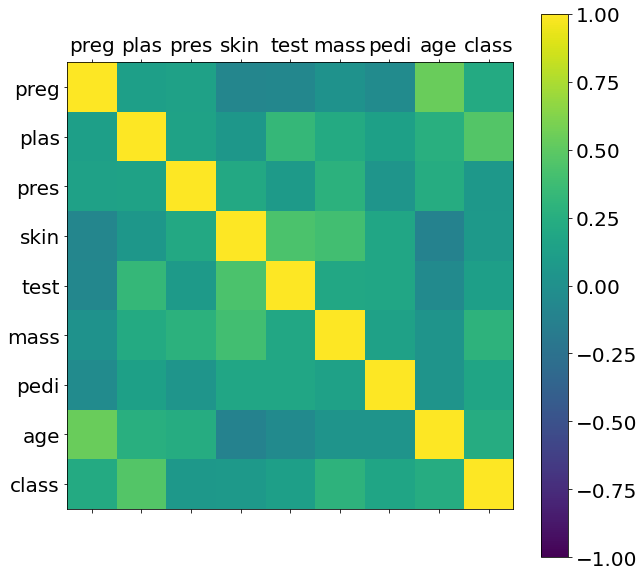

In [9]:
rcParams['figure.figsize'] = 10, 10
rcParams['font.size'] = 20

# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()


- Distribution that is SKEWED or squashed in one direction or another. 
- Knowing that an attribute has a skew may allow you to perform data preparation to  correct the skew and later improve the accuracy of your models. 
- The skew result show a positive (right) or negative (left) skew. **Values closer to zero show less skew.**



In [10]:
skew = data.skew()
print(skew)

preg     0.902
plas     0.174
pres    -1.844
skin     0.109
test     2.272
mass    -0.429
pedi     1.920
age      1.130
class    0.635
dtype: float64



- HISTOGRAMS group data into bins and provide you a count of the number of observations in each bin. 
- From the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian, skewed or even has an exponential distribution



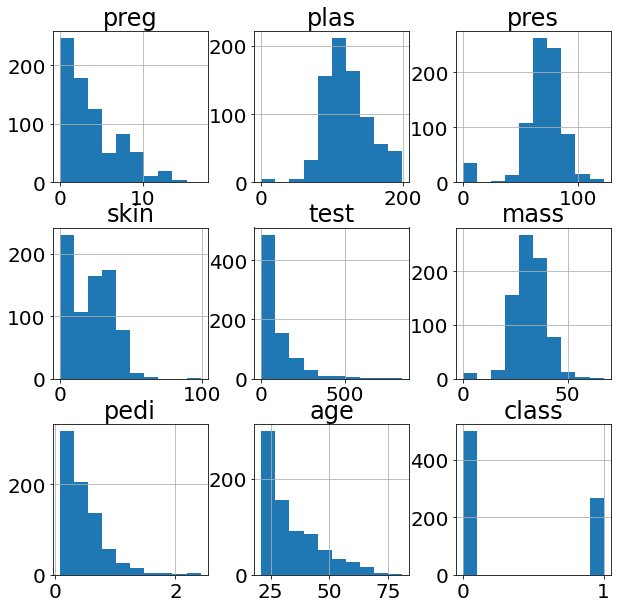

In [11]:
data.hist()
rcParams['font.size'] = 20
#print(rcParams.keys())
pyplot.show()

# Density plot


- Density plots are another way of getting a quick idea of the distribution of each attribute.
- The plots look like an abstracted histogram with a smooth curve drawn through the top of each bin.



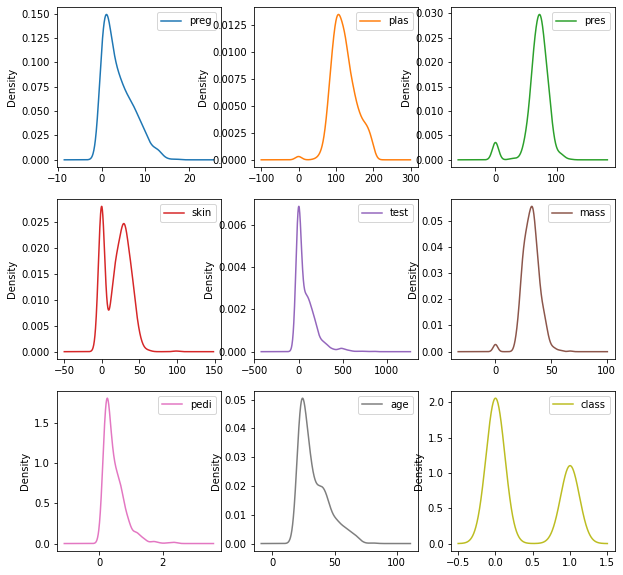

In [12]:
rcParams['font.size'] = 10
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False) 
pyplot.show()


- BOXPLOTS summarize the distribution of each attribute, drawing a line for the median (middle value) and a box around the 25th and 75th percentiles (the middle 50% of the data). 
- The WHISKERS give an idea of the spread of the data and dots outside of the whiskers show candidate outlier values (values that are 1.5 times greater than the size of spread of the middle 50% of the data).



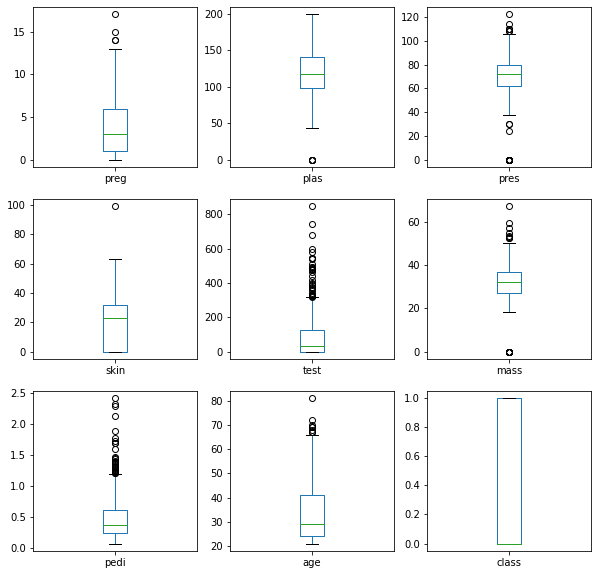

In [13]:
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()


- SCATTER PLOTS are useful for spotting structured relationships between variables, like whether you could summarize the relationship between two variables with a line. 
- Attributes with structured relationships may also be correlated and good candidates for removal from your dataset.



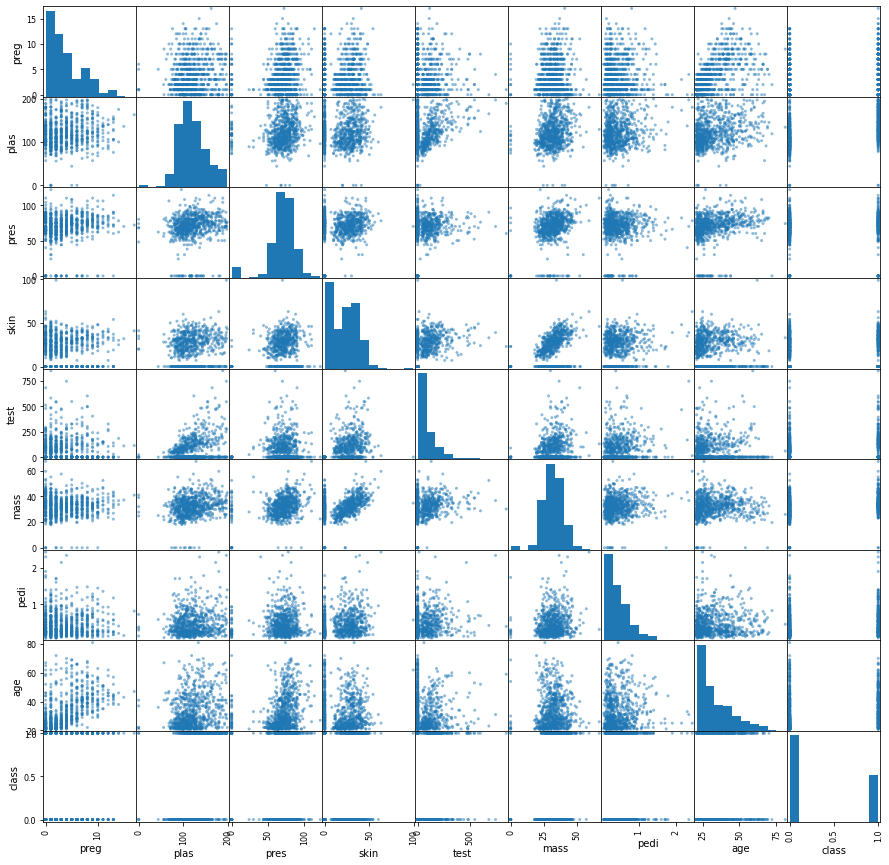

In [17]:
rcParams['figure.figsize'] = 15, 15
scatter_matrix(data)
pyplot.show()